<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/M%C3%A9tododeM%C3%ADnimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consideremos el problema

$\frac{\mathrm{d^2 u} }{\mathrm{d} x^2}+u=x$

con las condiciones $u(0)=0$ y $u´(0)=2$.

Resolveremos este problema usando el método de mínimos cuadrados, proponemos una solución de la forma:

$U_N=\sum_{i=1}^{N}α_iβ_i(x)=α_1β_1(x)+α_2β_2(x)+...+α_Nβ_N(x)$

donde las $β_i(x)$ son llamadas funciones base.

Una medida de la aproximación de la solución $U_N$ es a través del error

$E=\frac{\mathrm{d^2 U_N} }{\mathrm{d} x^2}+U_N+x$

Pero elegimos los parámetros de modo tal que se minimice la cantidad:

$F=\int_{a}^{b}E^2dx$

donde $[a,b]$ es el intervalo de interés.

Para nuestro ejemplo solo necesitamos dos funciones base:

$U_N=α_1β_1(x)+α_2β_2(x)=α_1x(1-x)+α_2x^2(1-x)$

El intervalo en el que integraremos es $[0,3π]$, ya que no se menciona ningún intervalo de interés en la imagen de la tarea.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x, a, b = sp.symbols('x a b') # variable
u = sp.Function('u') # función

In [ ]:
ode = u(x).diff(x,x) + u(x) - x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [ ]:
sol = sp.dsolve(ode, ics={u(0):0, u(x).diff(x).subs(x, 0):2})

In [ ]:
sol

Eq(u(x), x + sin(x))

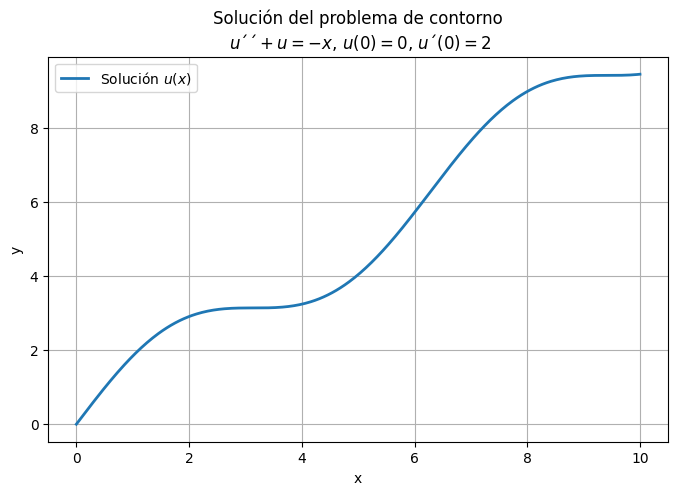

In [ ]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,10,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u´´ + u=-x$, $u(0)=0$, $u´(0)=2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
u_n= a*x*(1-x)+b*x**2*(1-x)

In [ ]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [ ]:
u_n_2=sp.diff(u_n,x,2)

E=u_n_2+u_n+ x

Calculamos el error de la aproximación numérica:

In [ ]:
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

In [ ]:
Integramos en el intervalo que propuse:

In [ ]:
I= sp.integrate(E**2,(x,0,sp.pi*3))

In [ ]:
I

2187*pi**7*b**2/7 + 729*pi**6*(a*b/3 - b**2/3) + 3*pi*(4*a**2 - 8*a*b + 4*b**2) + 243*pi**5*(a**2/5 - 4*a*b/5 + 13*b**2/5 - 2*b/5) + 9*pi**2*(-2*a**2 + 14*a*b - 2*a - 12*b**2 + 2*b) + 81*pi**4*(-a**2/2 + 9*a*b/2 - a/2 - 4*b**2 + b/2) + 27*pi**3*(5*a**2/3 - 20*a*b/3 + 2*a/3 + 40*b**2/3 - 4*b + 1/3)

In [ ]:
dIa=sp.diff(I,a)
dIb=sp.diff(I,b)

In [ ]:
print(dIa,"\n",dIb)

243*pi**6*b + 243*pi**5*(2*a/5 - 4*b/5) + 3*pi*(8*a - 8*b) + 9*pi**2*(-4*a + 14*b - 2) + 81*pi**4*(-a + 9*b/2 - 1/2) + 27*pi**3*(10*a/3 - 20*b/3 + 2/3) 
 4374*pi**7*b/7 + 3*pi*(-8*a + 8*b) + 729*pi**6*(a/3 - 2*b/3) + 27*pi**3*(-20*a/3 + 80*b/3 - 4) + 243*pi**5*(-4*a/5 + 26*b/5 - 2/5) + 81*pi**4*(9*a/2 - 8*b + 1/2) + 9*pi**2*(14*a - 24*b + 2)


In [ ]:
soleq=sp.solve([dIa,dIb], [a, b], simplify=True)
soleq

{a: (-56862*pi**6 - 2835*pi**4 + 14000 + 1680*pi**2 + 30240*pi**3 + 42120*pi**5 + 43740*pi**7)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8),
 b: 7*(-1458*pi**6 - 405*pi**4 - 1080*pi**3 + 2000 + 240*pi**2 + 1620*pi**5)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8)}

In [ ]:
u_approx=E.subs(soleq)

In [ ]:
u_approx

7*x**2*(1 - x)*(-1458*pi**6 - 405*pi**4 - 1080*pi**3 + 2000 + 240*pi**2 + 1620*pi**5)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8) + x*(1 - x)*(-56862*pi**6 - 2835*pi**4 + 14000 + 1680*pi**2 + 30240*pi**3 + 42120*pi**5 + 43740*pi**7)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8) - 28*x*(-1458*pi**6 - 405*pi**4 - 1080*pi**3 + 2000 + 240*pi**2 + 1620*pi**5)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8) + x - 14*(x - 1)*(-1458*pi**6 - 405*pi**4 - 1080*pi**3 + 2000 + 240*pi**2 + 1620*pi**5)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8) - 2*(-56862*pi**6 - 2835*pi**4 + 14000 + 1680*pi**2 + 30240*pi**3 + 42120*pi**5 + 43740*pi**7)/(-87480*pi**7 - 61560*pi**5 - 75600*pi**3 + 70000 + 121800*pi**2 + 119475*pi**4 + 90396*pi**6 + 43740*pi**8)

In [ ]:
u_approx_fn=sp.lambdify(x,u_approx, "numpy")

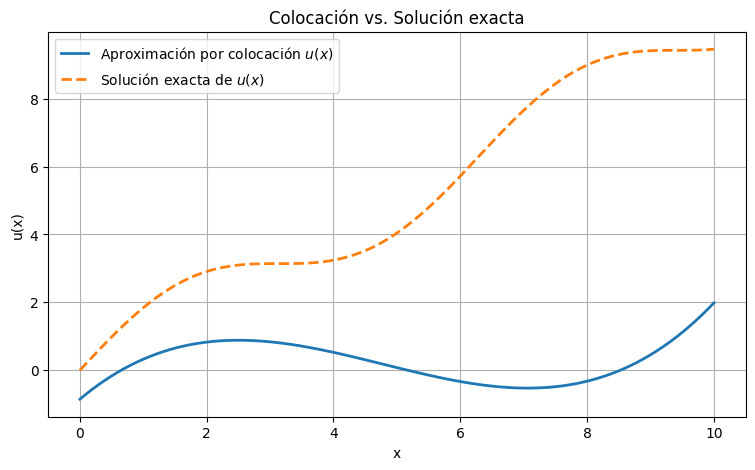

In [ ]:
xx=np.linspace(0,10,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación $u(x)$", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta de $u(x)$", linewidth=2)


plt.title('Colocación vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()